<a href="https://colab.research.google.com/github/Lnogueira2222/Ligas-de-Tit-nio---E-/blob/main/RMSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Boost Regressor

Root Mean Squared Error: 12.657186463092577
Cr: 0.0015
Cu: 0.0000
Fe: 0.0102
Mn: 0.0000
Mo: 0.0033
Nb: 0.0315
Si: 0.0373
Sn: 0.0059
Ta: 0.0310
Ti: 0.0465
V: 0.0001
Zr: 0.0124
Sid: 0.0432
Electronegativity_avgs_w: 0.0074
Electronegativity_std_devs_w: 0.0212
VEC_avgs_w: 0.0343
VEC_std_devs_w: 0.0234
AtomicRadius_avgs_w: 0.0146
AtomicRadius_std_devs_w: 0.1608
LatticeConstant_avgs_w: 0.0179
LatticeConstant_std_devs_w: 0.0090
MeltT_avgs_w: 0.0212
MeltT_std_devs_w: 0.1154
phi: 0.0003
Meq_avgs_w: 0.0227
Meq_std_devs_w: 0.0308
Md_avgs_w: 0.0089
Md_std_devs_w: 0.1928
Bo_avgs_w: 0.0119
Bo_std_devs_w: 0.0846


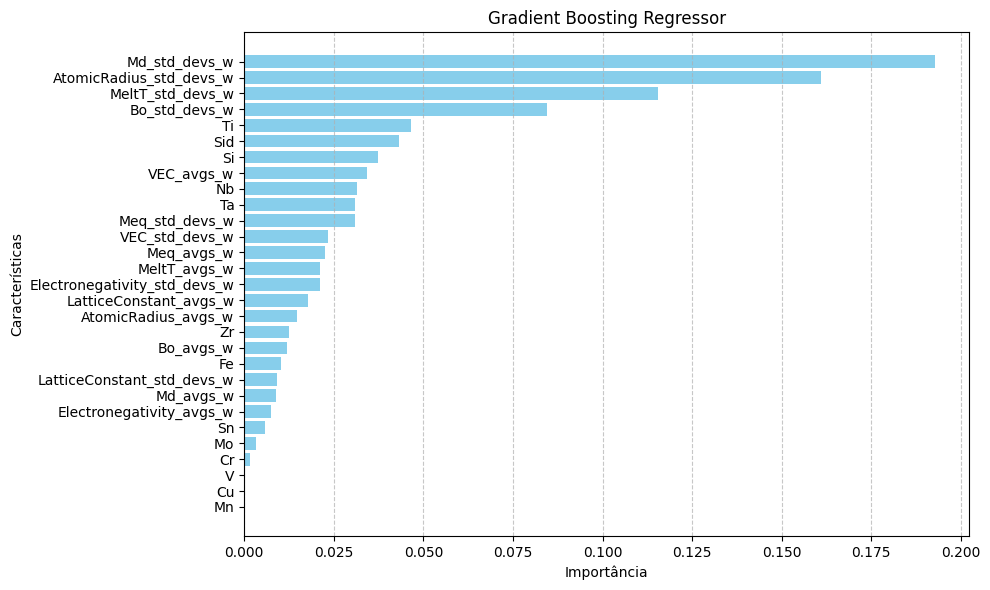

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Carregar a base de dados
# Suponha que a base de dados esteja em um arquivo chamado 'ligas_titanio.csv'
df = pd.read_csv('E_ML_descriptors.csv')

# Suponha que as colunas com a composição dos elementos são 'elemento1', 'elemento2', etc.
# e que 'modulo_elastico' é a coluna alvo
X = df.drop('E', axis=1)  # Características (composição química)
y = df['E']               # Variável alvo (módulo elástico)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo Gradient Boosting Regressor
gbr = GradientBoostingRegressor(learning_rate= 0.1,
 max_depth= 3,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 100,
 random_state=1
)

# Treinar o modelo
gbr.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = gbr.predict(X_test)

# Avaliar o modelo usando Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Exibir a importância das características
feature_importance = gbr.feature_importances_
for i, col in enumerate(X.columns):
    print(f'{col}: {feature_importance[i]:.4f}')
features = X.columns

# Criar um DataFrame para organizar e ordenar os dados
importance_df = pd.DataFrame({'Característica': features, 'Importância': feature_importance})
importance_df = importance_df.sort_values(by='Importância', ascending=False)

# Plotar o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Característica'], importance_df['Importância'], color='skyblue')
plt.gca().invert_yaxis()  # Inverter o eixo para que a maior importância fique no topo
plt.xlabel('Importância')
plt.ylabel('Características')
plt.title('Gradient Boosting Regressor')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Gradient Boost Regressor Best Parameters



In [ ]:
pip install pandas scikit-learn

ERROR: Operation cancelled by user


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
gbr = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.025, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [2, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'random_state':[1, 10, 100, 500],
    'max_features':["sqrt",0.25, 1],
}
# Carregar a base de dados
# Suponha que a base de dados esteja em um arquivo chamado 'ligas_titanio.csv'
df = pd.read_csv('E_ML_descriptors.csv')

# Suponha que as colunas com a composição dos elementos são 'elemento1', 'elemento2', etc.
# e que 'modulo_elastico' é a coluna alvo
X = df.drop('E', axis=1)  # Características (composição química)
y = df['E']               # Variável alvo (módulo elástico)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo Gradient Boosting Regressor
gbr_cv = GridSearchCV(gbr, param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Treinar o modelo
gbr_cv.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = gbr_cv.predict(X_test)

# Avaliar o modelo usando Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Exibir a importância das características
#feature_importance = gbr.feature_importances_
#for i, col in enumerate(X.columns):
#    print(f'{col}: {feature_importance[i]:.4f}')

#plt.figure(figsize=(8, 6))
#plt.scatter(y_test, y_pred, color='blue', label='Previsões')
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-', label='Ideal')
#plt.xlabel('Dados')
#plt.ylabel('Previsão')
#plt.title(f'Gradient Boosting Regressor - Dados vs Previsão (RMSE: {rmse:.2f})')
#plt.legend()
#plt.grid(True)
#plt.show()
gbr_cv.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Root Mean Squared Error: 12.674707312527833


{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 0.25,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'n_estimators': 200,
 'random_state': 1}

# Random Forest Regressor Best Parameters


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

rfr = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [2, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'random_state':[1, 10, 45, 100, 500],
    'max_features':["auto","sqrt"],
    "bootstrap":[True, False]
}
# Carregar a base de dados
# Suponha que a base de dados esteja em um arquivo chamado 'ligas_titanio.csv'
df = pd.read_csv('E_ML_descriptors.csv')

# Suponha que as colunas com a composição dos elementos são 'elemento1', 'elemento2', etc.
# e que 'modulo_elastico' é a coluna alvo
X = df.drop('E', axis=1)  # Características (composição química)
y = df['E']               # Variável alvo (módulo elástico)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo Random Forest Regressor
rfr_cv = GridSearchCV(rfr, param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Treinar o modelo
rfr_cv.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rfr_cv.predict(X_test)

# Avaliar o modelo usando Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# RMSE - Mean absolute square error
# Salvar em lista, ordenar por maior, salvar em csv.

# Exibir a importância das características
#feature_importance = rfr.feature_importances_
#for i, col in enumerate(X.columns):
    #print(f'{col}: {feature_importance[i]:.4f}')
#plt.figure(figsize=(8, 6))
#plt.scatter(y_test, y_pred, color='green', label='Previsões')
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-', label='Ideal')
#plt.xlabel('Dados')
#plt.ylabel('Previsão')
#plt.title(f'Random Forest - Dados vs Previsão (RMSE: {rmse:.2f})')
#plt.legend()
#plt.grid(True)
#plt.show()
rfr_cv.best_params_

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
18750 fits failed out of a total of 37500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/bas

Root Mean Squared Error: 12.925177067227823


{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100,
 'random_state': 45}

# Random forest Regression






Root Mean Squared Error: 12.925177067227823
Cr: 0.0104
Cu: 0.0033
Fe: 0.0307
Mn: 0.0000
Mo: 0.0105
Nb: 0.0243
Si: 0.0173
Sn: 0.0023
Ta: 0.0152
Ti: 0.0553
V: 0.0007
Zr: 0.0205
Sid: 0.0616
Electronegativity_avgs_w: 0.0212
Electronegativity_std_devs_w: 0.0278
VEC_avgs_w: 0.0239
VEC_std_devs_w: 0.0253
AtomicRadius_avgs_w: 0.0561
AtomicRadius_std_devs_w: 0.0903
LatticeConstant_avgs_w: 0.0184
LatticeConstant_std_devs_w: 0.0261
MeltT_avgs_w: 0.0309
MeltT_std_devs_w: 0.0683
phi: 0.0002
Meq_avgs_w: 0.0371
Meq_std_devs_w: 0.0502
Md_avgs_w: 0.0262
Md_std_devs_w: 0.1050
Bo_avgs_w: 0.0278
Bo_std_devs_w: 0.1130


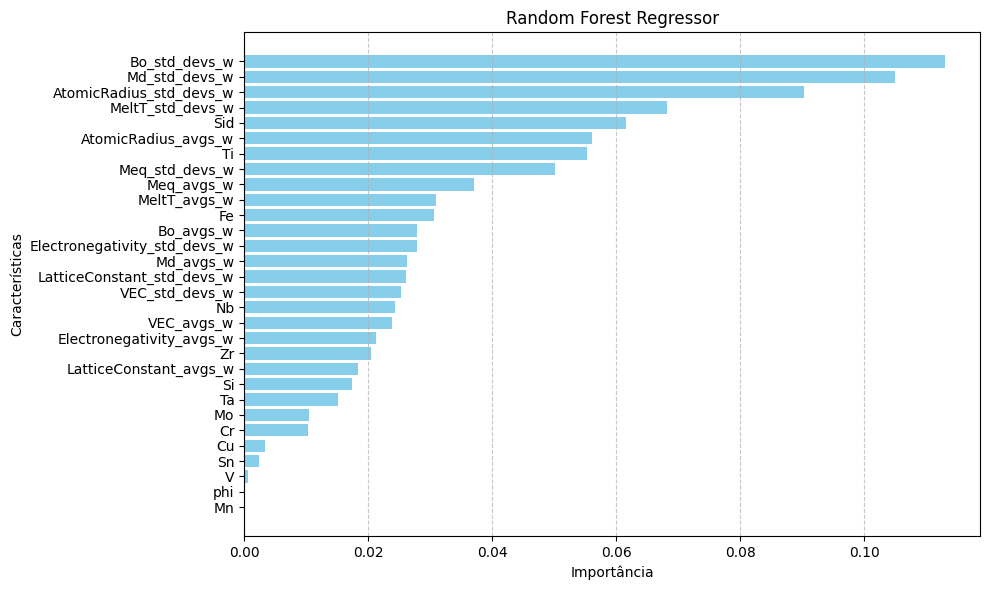

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Carregar a base de dados
# Suponha que a base de dados esteja em um arquivo chamado 'ligas_titanio.csv'
df = pd.read_csv('E_ML_descriptors.csv')

# Suponha que as colunas com a composição dos elementos são 'elemento1', 'elemento2', etc.
# e que 'modulo_elastico' é a coluna alvo
X = df.drop('E', axis=1)  # Características (composição química)
y = df['E']               # Variável alvo (módulo elástico)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo Random Forest Regressor
rfr = RandomForestRegressor(bootstrap= False,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 max_depth=10,
 min_samples_split= 5,
 n_estimators = 100,
 random_state = 45
 )
# Treinar o modelo
rfr.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rfr.predict(X_test)

# Avaliar o modelo usando Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# RMSE - Mean absolute square error
# Salvar em lista, ordenar por maior, salvar em csv.

# Exibir a importância das características
feature_importance = rfr.feature_importances_
for i, col in enumerate(X.columns):
    print(f'{col}: {feature_importance[i]:.4f}')

features = X.columns

# Criar um DataFrame para organizar e ordenar os dados
importance_df = pd.DataFrame({'Característica': features, 'Importância': feature_importance})
importance_df = importance_df.sort_values(by='Importância', ascending=False)

# Plotar o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Característica'], importance_df['Importância'], color='skyblue')
plt.gca().invert_yaxis()  # Inverter o eixo para que a maior importância fique no topo
plt.xlabel('Importância')
plt.ylabel('Características')
plt.title('Random Forest Regressor')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Carregar a base de dados
# Suponha que a base de dados esteja em um arquivo chamado 'ligas_titanio.csv'
df = pd.read_csv('E_ML_descriptors.csv')

# Suponha que as colunas com a composição dos elementos são 'elemento1', 'elemento2', etc.
# e que 'modulo_elastico' é a coluna alvo
X = df.drop('E', axis=1)  # Características (composição química)
y = df['E']               # Variável alvo (módulo elástico)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo Support Vector Regressor
svr = SVR()
print(svr.get_params())
# Treinar o modelo
svr.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = svr.predict(X_test)

# Avaliar o modelo usando Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Exibir a importância das características
# SVR não fornece diretamente importâncias das características,
# mas podemos usar os coeficientes em caso de kernel linear
if svr.kernel == 'linear':
    for i, col in enumerate(X.columns):
        print(f'{col}: {svr.coef_[0][i]:.4f}')

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Root Mean Squared Error: 18.704582157947844


# Support Vector Regression


Root Mean Squared Error: 14.449779225228562


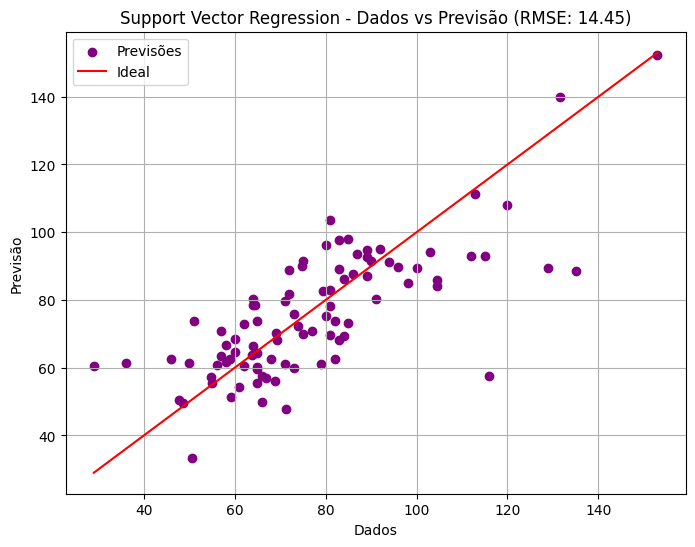

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Carregar a base de dados
# Suponha que a base de dados esteja em um arquivo chamado 'ligas_titanio.csv'
df = pd.read_csv('E_ML_descriptors.csv')

# Suponha que as colunas com a composição dos elementos são 'elemento1', 'elemento2', etc.
# e que 'modulo_elastico' é a coluna alvo
X = df.drop('E', axis=1)  # Características (composição química)
y = df['E']               # Variável alvo (módulo elástico)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo Support Vector Regressor
svr = SVR(
    epsilon = 0.2,
    kernel="rbf",
    gamma= 0.05,
    C=100,
    degree= 1)

# Treinar o modelo
svr.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = svr.predict(X_test)

# Avaliar o modelo usando Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Exibir a importância das características
# SVR não fornece diretamente importâncias das características,
# mas podemos usar os coeficientes em caso de kernel linear
if svr.kernel == 'linear':
    for i, col in enumerate(X.columns):
        print(f'{col}: {svr.coef_[0][i]:.4f}')
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', label='Previsões')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-', label='Ideal')
plt.xlabel('Dados')
plt.ylabel('Previsão')
plt.title(f'Support Vector Regression - Dados vs Previsão (RMSE: {rmse:.2f})')
plt.legend()
plt.grid(True)
plt.show()

# Suport Vector Regression Best Parameters

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

svr=SVR()
param_grid = {
    'epsilon': [0.025,0.05, 0.1, 0.2],
    "kernel":["linear","rbf"],
    "gamma":["scale",0.025,0.05, 0.1, 0.2],
    "C":[1,10,100,1000,10000],
    "degree":[1,2,3,5]
}

# Carregar a base de dados
# Suponha que a base de dados esteja em um arquivo chamado 'ligas_titanio.csv'
df = pd.read_csv('E_ML_descriptors.csv')

# Suponha que as colunas com a composição dos elementos são 'elemento1', 'elemento2', etc.
# e que 'modulo_elastico' é a coluna alvo
X = df.drop('E', axis=1)  # Características (composição química)
y = df['E']               # Variável alvo (módulo elástico)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo Support Vector Regressor
svr_cv = GridSearchCV(svr, param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Treinar o modelo
svr_cv.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = svr_cv.predict(X_test)

# Avaliar o modelo usando Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Exibir a importância das características
# SVR não fornece diretamente importâncias das características,
# mas podemos usar os coeficientes em caso de kernel linear
#if svr.kernel == 'linear':
    #for i, col in enumerate(X.columns):
       # print(f'{col}: {svr.coef_[0][i]:.4f}')
#plt.figure(figsize=(8, 6))
#plt.scatter(y_test, y_pred, color='purple', label='Previsões')
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-', label='Ideal')
#plt.xlabel('Dados')
#plt.ylabel('Previsão')
#plt.title(f'Support Vector Regression - Dados vs Previsão (RMSE: {rmse:.2f})')
#plt.legend()
#plt.grid(True)
#plt.show()
svr_cv.best_params_

Root Mean Squared Error: 14.449779225228562


{'C': 100, 'degree': 1, 'epsilon': 0.2, 'gamma': 0.05, 'kernel': 'rbf'}